In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("customers_churn.csv")

In [3]:
data

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,total_Mins,Intl_Calls,Intl_Charge,Total_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,717.2,3,2.70,75.56,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,625.2,3,3.70,59.24,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,539.4,5,3.29,62.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,564.8,7,1.78,66.80,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,512.0,3,2.73,52.09,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,660.7,6,2.67,60.10,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,585.4,4,2.59,63.53,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,675.6,6,3.81,67.74,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,517.6,10,1.35,57.53,2,0


In [4]:
data.dtypes

State              object
Account_Length      int64
Area_Code           int64
Phone              object
Intl_Plan          object
VMail_Plan         object
VMail_Message       int64
Day_Mins          float64
Day_Calls           int64
Day_Charge        float64
Eve_Mins          float64
Eve_Calls           int64
Eve_Charge        float64
Night_Mins        float64
Night_Calls         int64
Night_Charge      float64
Intl_Mins         float64
total_Mins        float64
Intl_Calls          int64
Intl_Charge       float64
Total_Charge      float64
CustServ_Calls      int64
Churn               int64
dtype: object

In [5]:
# Remove the State and Phone categoricals, separate y from X
X = data.drop(columns=["Churn", "State", "Phone"])
y = data["Churn"]

In [6]:
# Convert "yes" to 1 and "no" to 0 in VMail_Plan, Intl_Plan features and should in place to avoid change strings to float in train_test_split
# your code here...

X["Intl_Plan_converted"] = X["Intl_Plan"].map({"yes": 1, "no": 0}) # i should in place to avoid change strings to float in train_test_split
X["VMail_Plan_converted"] = X["VMail_Plan"].map({"yes": 1, "no": 0})

# Drop the original VMail_Plan and Intl_Plan columns

X = X.drop(columns=["Intl_Plan", "VMail_Plan"])

In [7]:
X

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,total_Mins,Intl_Calls,Intl_Charge,Total_Charge,CustServ_Calls,Intl_Plan_converted,VMail_Plan_converted
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,717.2,3,2.70,75.56,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,625.2,3,3.70,59.24,1,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,539.4,5,3.29,62.29,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,564.8,7,1.78,66.80,2,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,512.0,3,2.73,52.09,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,660.7,6,2.67,60.10,2,0,1
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,585.4,4,2.59,63.53,3,0,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,675.6,6,3.81,67.74,2,0,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,517.6,10,1.35,57.53,2,1,0


In [8]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

As you can see, this is an unbalanced dataset with "0" (negative) rate of 85%.
This means that whatever we get from the learning algorithm, if it is less than 85% then it is worthless, because we could get that simply by predicting "0".

In [9]:
# Split dataset into training set and test set with 70%-30%

# ...
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [10]:
# Create Decision Tree classifier object - no restrictions for now
clf = DecisionTreeClassifier(min_samples_split=2, max_depth=None)

# Your code below - fit the model
#...
tree = clf.fit(X_train, y_train) # Assigning the result to a variable tree will allow us to view the tree


In [11]:
# Print the test accuracy and the train accuracy
# your code here
# ...
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))


Accuracy: 0.945
Accuracy: 1.0


There is probably a bit of overfitting.  Let us view the tree.

In [12]:
from sklearn.tree import export_graphviz
import pydotplus

# This will create a .dot file, which is a standard for representing trees.
# Feel free to open it and view it (it is textual)
export_graphviz(tree, out_file="tree.dot",
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns,
                class_names=['0','1'])
import pydotplus # for viewing .dot files
pydotplus.graph_from_dot_file("tree.dot").write_png('tree.png')

True

### Inspecting the tree visually
Open the file tree.png that was created, and view it with your favorite viewer.  The resulting tree is extremely complex, and you may need a zoom-in tool to see what's going on.  The first thing to note is that the algorithm uses the "gini" index to decide whether to split a node.  Each node in the tree is annotated with the Gini index. This is because by default, the algorithm uses the "gini" criterion.  If you look at the documentation, you shall see that this criterion can be changed in the arguments of DecisionTreeClassifier, using the keyword criterion="entropy" for Information Gain as we learned in class.  
Additionally, each node is also annotated with the number of training examples falling in the region defined by the node, and also with a count of the number of "0" and number of "1"'s in the training set in that region ("value" in the picture), which can be used for soft prediction. Finally you will see "class" which is the hard prediction.
 If you inspect the leaves, you will see that they are all pure, which happens because we enforced no limits on the output tree.

To fight the overfitting, we may want to limit the tree in some way.  max_depth is a typical way.  Let's try it.

In [13]:
# Create Decision Tree classifier object with depth at most 2
clf = DecisionTreeClassifier(max_depth = 2)
# Your code below
tree = clf.fit(X_train, y_train) # Assigning the result to a variable tree will allow us to view the tree


In [14]:
export_graphviz(tree, out_file="tree2.dot",
                filled=True, rounded=True,
                special_characters=True,
                class_names=['0','1'],
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_file("tree2.dot").write_png('tree2.png')
# View the resulting tree2.png, compare to tree.png

Let's look at the training and validation error.

In [15]:
# Your code here for printing training and validation error

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))


Accuracy: 0.905
Accuracy: 0.9189884269181312


### The sweet spot plot: Visualizing overfitting
In this exercise we will go back to the binary classification problem, and we shall vary the max-depth parameter from 1 to 20. For each value of max-depth, we will run k-fold cross validation on the decision tree classifier, in order to get a low-variance estimate of both the training and of the validation error.  Finally, we will plot both the training and validation errors and see what we get.

We will use sklean's model_selection.KFold for performing the K-fold management.  There are other options, for example model_selection.cross_val_score, but the "KFold" option gives us low-level control over the process, which we need for this case.

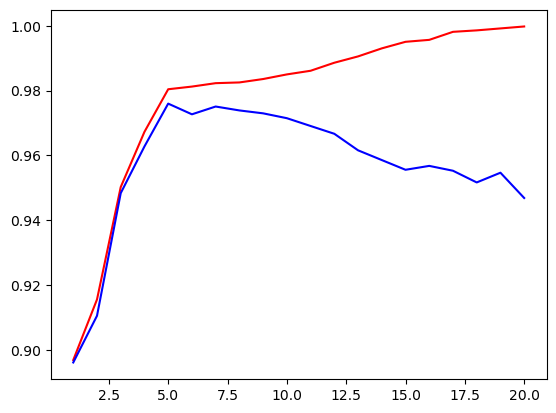

In [17]:
from sklearn.model_selection import KFold
max_depth_vals = range(1,21)
train_accuracies = []
test_accuracies = []
n_splits = 5
for max_depth in max_depth_vals:
  kf = KFold(n_splits=n_splits, shuffle=True)
  av_train_accuracy = 0.0
  av_test_accuracy = 0.0
  for i, (train_index, val_index) in enumerate(kf.split(X)):
    # train_index is series of indices of training set
    # test_index is series of indices of the test set
    # you can use them to extract a training and test index for the current fold
    # your code here to extract a train, val dataframes

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    # Create Decision Tree classifier object with depth at most max_depth

    clf = DecisionTreeClassifier(max_depth = max_depth)
    # Your code here... fit clf on the extracted train, test dataset
    # Then compute train_accuracy and test_accuracy
    
    tree = clf.fit(X_train, y_train) # Assigning the result to a variable tree will allow us to view the tree
    y_pred = clf.predict(X_val)
    test_accuracy = metrics.accuracy_score(y_val, y_pred)
    y_pred = clf.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_pred)

    av_train_accuracy += train_accuracy / n_splits
    av_test_accuracy  += test_accuracy / n_splits
  train_accuracies.append(av_train_accuracy)
  test_accuracies.append(av_test_accuracy)
plt.plot(max_depth_vals, train_accuracies, 'r') # train curve in red
plt.plot(max_depth_vals, test_accuracies, 'b')#test curve in blue

## Write down your conclusions, insights, and further ideas below

_The high accuracies indicate that the features selected are significant predictors of customer churn.

_The presence of a 100% accuracy metric suggests potential overfitting, 
which could be addressed by further model validation or the introduction of regularization techniques.

_The model has an optimal complexity level at which its performance on unseen data is maximized.

_Beyond this optimal point, increasing the complexity of the model harms its ability to generalize, despite continued improvements in training set performance.

_The task at hand should be to adjust the model's complexity to this optimal point to ensure the best performance on new, unseen data.

_Regularization techniques or pruning methods might be used to prevent the model from becoming overly complex.

_It may also be beneficial to collect more data or perform data augmentation to improve the model's ability to generalize.

_Cross-validation could be used to confirm the findings from this single validation set and ensure the sweet spot is consistent across different subsets of the data